In [1]:
arr: list[int] = [0] * 5
nums: list[int] = [1,2,3,4,5,]

数组具有空间效率高、支持$O(1)$内随机访问， 具有缓存的局部性等特点，但是也有长度不可变、空间碎片化浪费问题、插入与删除效率低等问题；
note：神经网络中的向量、张量等数据结构都是以数组的形式构建的
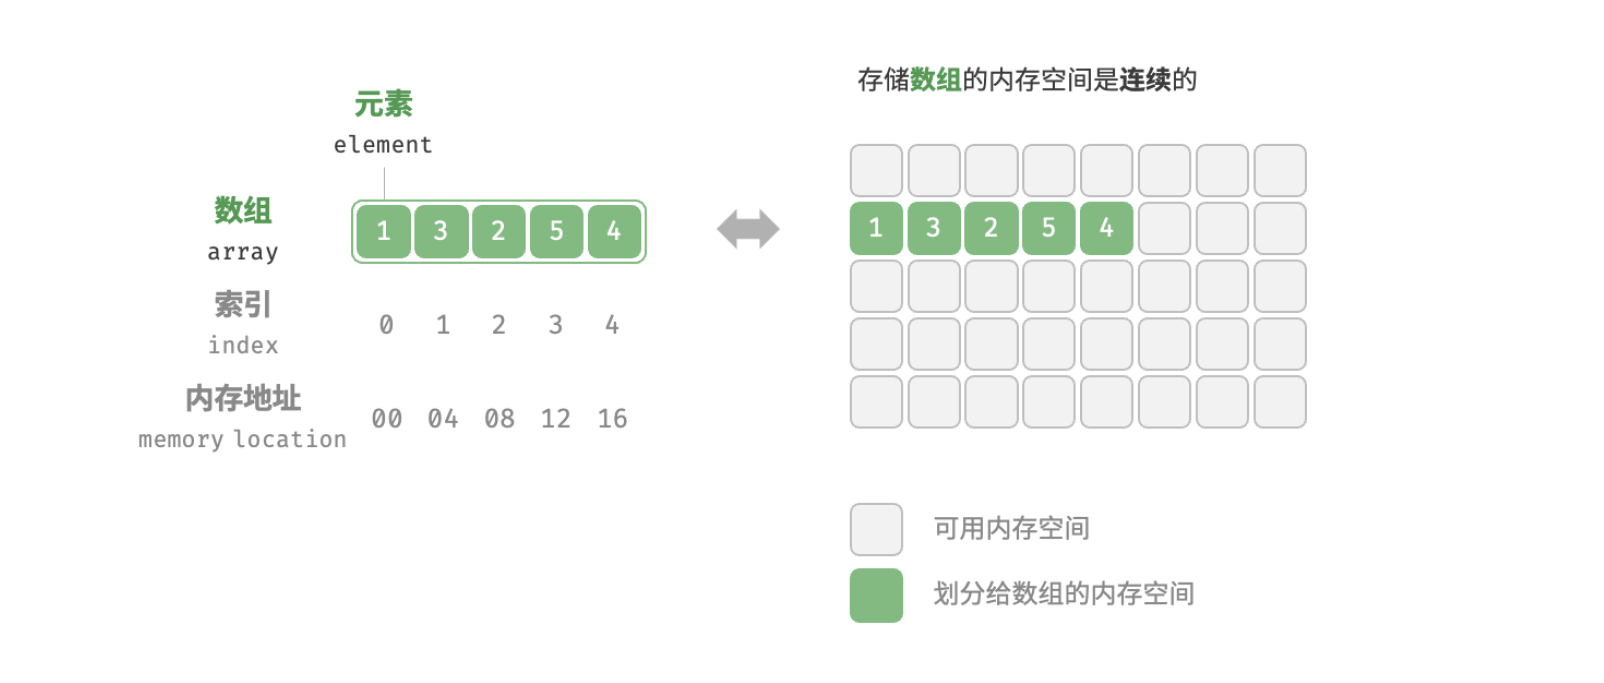

In [4]:
# 数组
import random
# 随机取出
def random_access(nums: list[int]) -> int:
    random_index = random.randint(0, len(nums) - 1)
    random_num = nums[random_index]
    return random_num
# 插入操作
def insert(nums: list[int], num: int, index: int):
    for i in range(len(nums) - 1, index, -1):
        nums[i] = nums[i -1]
    nums[index] = num

# 按照索引删除操作
def remove(nums: list[int], index: int):
    for i in range(index, len(nums) - 1):
        nums[i] = nums[i + 1]

# 遍历操作
def traverse(nums: list[int]):
    count = 0
    for i in range(len(nums)):
        count += nums[i]
    for num in nums:
        count += num
    for i, num in enumerate(nums):
        count += nums[i]
        count += num

def extend(nums: list[int], enlarge: int) -> list[int]:
    res = [0] * (len(nums) + enlarge)
    for i in range(len(nums)):
        res[i] = nums[i]
    return res

## test
nums: list[int] = [1,2,3,4,5,]
print(random_access(nums))
insert(nums, 6, 2)
print(nums)
remove(nums, 2)
print(nums)
print(extend(nums, 5))
traverse(nums)


2
[1, 2, 6, 3, 4]
[1, 2, 3, 4, 4]
[1, 2, 3, 4, 4, 0, 0, 0, 0, 0]


In [6]:
# 单向链表
class ListNode:
    def __init__(self, val: int):
        self.val: int = val
        self.next: ListNode | None = None
        
n0 = ListNode(1)
n1 = ListNode(2)
n2 = ListNode(3)
n0.next = n1
n1.next = n2
n2.next = None
    
def insert(n0: ListNode, P: ListNode):
    """"insert P after n0"""
    n1 = n0.next
    P.next = n1
    n0.next = P

def remove(n0: ListNode):
    """delete the next node of n0"""
    if not n0.next:
        return
    # n0 -> P -> n1
    n1 = n0.next
    n2 = n1.next
    n0.next = n2

def access(head: ListNode, index: int) -> ListNode | None:
    """find the node at index"""
    for _ in range(index):
        if not head:
            return None
        head = head.next
    return head
        
def find(head: ListNode, target: int) -> int:
    """find the node's index with target value"""
    index = 0
    while head:
        if head.val == target:
            return index
        head = head.next
        index += 1
    return -1 

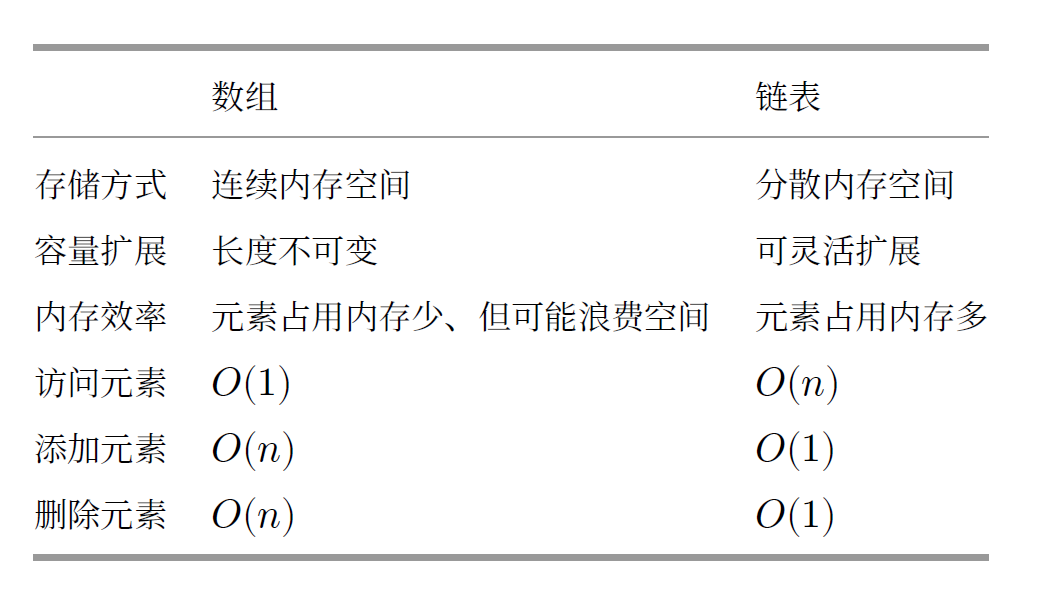

In [ ]:
# 双向链表
class ByListNode:
    def __init__(self, val: int):
        self.val: int = val
        self.prev: ByListNode | None = None
        self.next: ByListNode | None = None

In [8]:
class MyList:
    """列表类"""

    def __init__(self):
        """构造方法"""
        self._capacity: int = 10  # 列表容量
        self._arr: list[int] = [0] * self._capacity  # 数组（存储列表元素）
        self._size: int = 0  # 列表长度（当前元素数量）
        self._extend_ratio: int = 2  # 每次列表扩容的倍数

    def size(self) -> int:
        """获取列表长度（当前元素数量）"""
        return self._size

    def capacity(self) -> int:
        """获取列表容量"""
        return self._capacity

    def get(self, index: int) -> int:
        """访问元素"""
        # 索引如果越界，则抛出异常，下同
        if index < 0 or index >= self._size:
            raise IndexError("索引越界")
        return self._arr[index]

    def set(self, num: int, index: int):
        """更新元素"""
        if index < 0 or index >= self._size:
            raise IndexError("索引越界")
        self._arr[index] = num

    def add(self, num: int):
        """在尾部添加元素"""
        # 元素数量超出容量时，触发扩容机制
        if self.size() == self.capacity():
            self.extend_capacity()
        self._arr[self._size] = num
        self._size += 1

    def insert(self, num: int, index: int):
        """在中间插入元素"""
        if index < 0 or index >= self._size:
            raise IndexError("索引越界")
        # 元素数量超出容量时，触发扩容机制
        if self._size == self.capacity():
            self.extend_capacity()
        # 将索引 index 以及之后的元素都向后移动一位
        for j in range(self._size - 1, index - 1, -1):
            self._arr[j + 1] = self._arr[j]
        self._arr[index] = num
        # 更新元素数量
        self._size += 1

    def remove(self, index: int) -> int:
        """删除元素"""
        if index < 0 or index >= self._size:
            raise IndexError("索引越界")
        num = self._arr[index]
        # 将索引 index 之后的元素都向前移动一位
        for j in range(index, self._size - 1):
            self._arr[j] = self._arr[j + 1]
        # 更新元素数量
        self._size -= 1
        # 返回被删除的元素
        return num

    def extend_capacity(self):
        """列表扩容"""
        # 新建一个长度为原数组 _extend_ratio 倍的新数组，并将原数组复制到新数组
        self._arr = self._arr + [0] * self.capacity() * (self._extend_ratio - 1)
        # 更新列表容量
        self._capacity = len(self._arr)

    def to_array(self) -> list[int]:
        """返回有效长度的列表"""
        return self._arr[: self._size]

必要使用链表的情况主要是二叉树和图。栈和队列往往会使用编程语言提供的`stack` 和`queue`, 而非链表。